In [22]:
# Load Pandas library
import pandas as pd

#Load numpy library
import numpy as np

#import MatPlotLib
import matplotlib as mpl 

#Import PyPlot in MatPlotLib
import matplotlib.pyplot as plt 

#Import SciKitLearn decomposition PCA library
from sklearn.decomposition import PCA

#Import SciKitLearn dataset 
from sklearn import datasets as ds

#Helps create 80/20 split 
from sklearn.model_selection import ShuffleSplit

#Logistic Regression
from sklearn.linear_model import LogisticRegression

#LinearRegression 
from sklearn.linear_model import LinearRegression

#Allows for meterics to be found after Logistic Regression
from sklearn import metrics as mt

#Create KFolds for CV_Object
from sklearn.model_selection import KFold

#Creates Standard Scaler Variables
from sklearn.preprocessing import StandardScaler

#Support Vector Machine
from sklearn.svm import SVC

#Seaborn 
import seaborn as sb

#Magics for inline code.
%matplotlib inline

#Create Zillow Data Frame using Read_CSV
# read in the csv file
dfZillowData = pd.read_csv('/users/cmirwin/desktop/Smu Data Sets/Data Mining/ZillowData/Properties_2016.csv') 
#Get the headers to ensure all columns are included.
dfZillowData.head(10)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN
5,10898347,NaN,NaN,NaN,0.0,0.0,4.0,7.0,NaN,NaN,...,1.0,NaN,176383.0,283315.0,2015.0,106932.0,3661.28,NaN,NaN,NaN
6,10933547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,397945.0,554573.0,2015.0,156628.0,6773.34,NaN,NaN,NaN
7,10940747,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,1.0,NaN,101998.0,688486.0,2015.0,586488.0,7857.84,NaN,NaN,NaN
8,10954547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
9,10976347,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,218440.0,261201.0,2015.0,42761.0,4054.76,NaN,NaN,NaN


In [23]:
#We can see that a number of the data columns have NaN values that were assigned during import
#we choose to replace those values with the median values for the variable.

#Create new columns with highest missing values as True/False.
#print(dfMajorityOfDataMissing)

dfZillowData['hasbasement'] = dfZillowData[['basementsqft']].where(dfZillowData[['basementsqft']].isnull(), 1).fillna(0).astype(int)

dfZillowData['hasdeck'] = dfZillowData[['yardbuildingsqft26']].where(dfZillowData[['yardbuildingsqft26']].isnull(), 1).fillna(0).astype(int)

dfZillowData['hasfireplace'] = dfZillowData[['fireplaceflag']].where(dfZillowData[['fireplaceflag']].isnull(), 1).fillna(0).astype(int)

dfZillowData['hashottuborspa'] = dfZillowData[['hashottuborspa', 'pooltypeid2']].where(dfZillowData[['hashottuborspa','pooltypeid2']].isnull(), 1).fillna(0).astype(int)

dfZillowData['haspatio'] = dfZillowData[['yardbuildingsqft17']].where(dfZillowData[['yardbuildingsqft17']].isnull(), 1).fillna(0).astype(int)

#Create Function for County Rename
def rename(row):
    if row['regionidcounty'] == 1286:
        val = 'Ventura County'
    elif row['regionidcounty'] == 3101:
        val = 'Los Angeles County'
    else:
        val = 'Orange County'
    return val

dfZillowData['countyname'] = dfZillowData.apply(rename, axis=1)

#Need to transform Tax Value because of large outliers
dfZillowData['log10TaxValue'] = np.log10(dfZillowData['taxvaluedollarcnt'])

#Create New data frame for everything
dfForModel = dfZillowData.replace(to_replace='NaN',value= np.nan)

#Get median values for based on original values
dfMedians = pd.DataFrame(dfZillowData.median())

#Add Column Name to Medians DataFrame
dfMedians.columns = ['medianvalue']

#Create custom updates
dfColumns = pd.DataFrame(pd.Series([1.,0.,0.
                                    ,0.,0.
                                    ,0.,0.,0.
                                    ,13.,5.,0.
                                    ,24.,0.,0.
                                    ,0.,0.,0.
                                    ,0.]
              , index=['numberofstories', 'bathroomcnt','bedroomcnt'
                      ,'fireplacecnt','fullbathcnt'
                      , 'poolcnt', 'roomcnt','unitcnt'
                      , 'heatingorsystemtypeid','airconditioningtypeid', 'garagetotalsqft'
                      , 'storytypeid', 'basementsqft', 'finishedsquarefeet13'
                      , 'finishedsquarefeet6','finishedsquarefeet15','finishedsquarefeet50'
                      , 'finishedfloor1squarefeet']))
#Second Row #,0.#,'garagecarcnt'
#Set Column Name
dfColumns.columns = ['updatevalue']

#Create Merged Data set with values of both medians and custom
dfMerged = pd.concat([dfMedians, dfColumns], axis=1, join_axes=[dfMedians.index])

#Create new column of data that is custom values filled with median for any null
dfMerged['values'] = dfMerged['updatevalue'].fillna(dfMerged['medianvalue'])

#Apply median values to the overall data set
dfForModel = dfForModel.fillna(dfMerged['values'])

#Create dummy variables for all TypeId columns
#This section takes a long time due to the fact that we are creating 
#so many additional variables by 3 million records. 

#heatingorsystemtypeid
#Create dynamic Name
dummies = pd.get_dummies(dfForModel['heatingorsystemtypeid']).rename(columns=lambda x: 'HSTypeId_' + str(x))
#Join to Dataframe for Model
dfForModel = pd.concat([dfForModel, dummies], axis=1)

#Repeat of code above
#airconditioningtypeid
dummies = pd.get_dummies(dfForModel['airconditioningtypeid']).rename(columns=lambda x: 'ACTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['airconditioningtypeid'], inplace=True, axis=1)

#architecturalstyletypeid
dummies = pd.get_dummies(dfForModel['architecturalstyletypeid']).rename(columns=lambda x: 'ArchStyleTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['architecturalstyletypeid'], inplace=True, axis=1)

#decktypeid
dummies = pd.get_dummies(dfForModel['decktypeid']).rename(columns=lambda x: 'DeckTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['decktypeid'], inplace=True, axis=1)

#buildingclasstypeid
dummies = pd.get_dummies(dfForModel['buildingclasstypeid']).rename(columns=lambda x: 'BuildClassTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['buildingclasstypeid'], inplace=True, axis=1)

#typeconstructiontypeid
dummies = pd.get_dummies(dfForModel['typeconstructiontypeid']).rename(columns=lambda x: 'ConstructionTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['typeconstructiontypeid'], inplace=True, axis=1)

#buildingqualitytypeid
dummies = pd.get_dummies(dfForModel['buildingqualitytypeid']).rename(columns=lambda x: 'BuildingQualTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['buildingqualitytypeid'], inplace=True, axis=1)

#propertylandusetypeid
dummies = pd.get_dummies(dfForModel['propertylandusetypeid']).rename(columns=lambda x: 'LandUseTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['propertylandusetypeid'], inplace=True, axis=1)

#Find out what data types are in the Data set
dfDataTypes = pd.DataFrame(dfForModel)

#Create Numeric Only Dataframe
dfZillowDataNumeric = dfDataTypes.select_dtypes(['float64','int64'])

dfZillowDataNumeric.head(10)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,LandUseTypeId_260.0,LandUseTypeId_261.0,LandUseTypeId_263.0,LandUseTypeId_264.0,LandUseTypeId_265.0,LandUseTypeId_266.0,LandUseTypeId_267.0,LandUseTypeId_269.0,LandUseTypeId_270.0,LandUseTypeId_275.0
0,10754147,5.0,7.0,0.0,0.0,0.0,4.0,7.0,2.0,66.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,10759547,5.0,7.0,0.0,0.0,0.0,4.0,7.0,2.0,66.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10843547,5.0,7.0,0.0,0.0,0.0,4.0,7.0,2.0,66.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10859147,5.0,7.0,0.0,0.0,0.0,3.0,7.0,2.0,66.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10879947,5.0,7.0,0.0,0.0,0.0,4.0,7.0,2.0,66.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,10898347,5.0,7.0,0.0,0.0,0.0,4.0,7.0,2.0,66.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,10933547,5.0,7.0,0.0,0.0,0.0,4.0,7.0,2.0,66.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,10940747,5.0,7.0,0.0,0.0,0.0,4.0,7.0,2.0,66.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,10954547,5.0,7.0,0.0,0.0,0.0,4.0,7.0,2.0,66.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,10976347,5.0,7.0,0.0,0.0,0.0,3.0,7.0,2.0,66.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
def plot_class_acc(ytrue,yhat, title=''):
    acc_list = per_class_accuracy(ytrue,yhat)
    plt.bar(range(len(acc_list)), acc_list)
    plt.xlabel('Class value (one per face)')
    plt.ylabel('Accuracy within class')
    plt.title(title+", Total Acc=%.1f"%(100*mt.accuracy_score(ytrue,yhat)))
    plt.grid()
    plt.ylim([0,1])
    plt.show()

def per_class_accuracy(ytrue,yhat):
    conf = mt.confusion_matrix(ytrue,yhat)
    norm_conf = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
    return np.diag(norm_conf)

/Users/cmirwin/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Process start
Process End
Process start
Process End
Process start
Process End
Process start
Process End
Process start
Process End
('Pipeline accuracy', 0.97002605101288741)


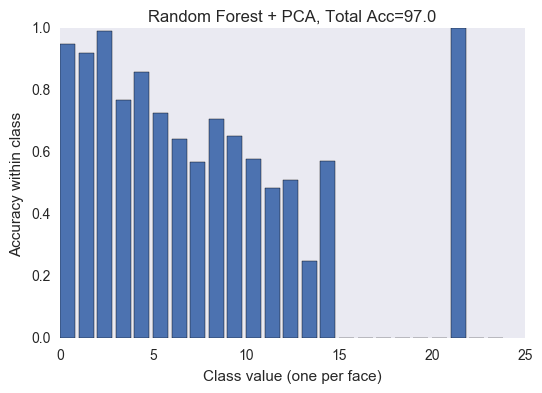

In [58]:
#Create data set that has all original values from the file.
#Every Zillow value with a real garage car count
dfTrainValues = dfZillowData[['parcelid']][~(dfZillowData['garagecarcnt'].isnull())]

#Get values for dfForModel 
dfTrainValues = pd.merge(dfTrainValues, dfForModel, on='parcelid', how='left')

#Create Numeric Dataframe only for PCA and Classification.
#Find out what data types are in the Data set
dfDataTypes = pd.DataFrame(dfTrainValues)

#Create Numeric Only Dataframe
dfTrainValuesNumeric = dfDataTypes.select_dtypes(['float64','int64'])
    
# scale attributes by the training set
stdsclrObjForGarage = StandardScaler()

# find scalings for each column that make this zero mean and unit std
#We use the training data to help fit the standard dev
# find scalings for each column that make this zero mean and unit std
stdsclrObjForGarage.fit(dfTrainValuesNumeric) 

# to transform new feature data
Garage_scaled = stdsclrObjForGarage.transform(dfTrainValuesNumeric)

#Create Cross Validation object and Test and train values
# we want to predict if a house has a garage
if 'garagecarcnt' in Garage_scaled:
        
    #Get the values for each property
    garageActualValues = Garage_scaled['garagecarcnt'].values 
    
    # get rid of the garagecarcnt variable
    print('Removing variable from dataset')
    del Garage_scaled['garagecarcnt'] 

    # Gather all values to use for prediction
    garageAdditionalVars = Garage_scaled.values  

# Create cross validation with KFolds object
num_cv_iterations = 5
#Create Cross Validation objects using folds
cv_object = KFold(n_splits=num_cv_iterations, random_state=None, shuffle=True)
  
# we will fill this with predictions
yhat = np.zeros(garageActualValues.shape) 

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

clf_pipe = Pipeline(
    [('PCA',PCA(n_components=50, svd_solver='randomized')),
     ('CLF',RandomForestClassifier(max_depth=50, n_estimators=150, n_jobs=-1))]
)

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv_object.split(garageAdditionalVars,garageActualValues):
    print ('Process start')
    clf_pipe.fit(garageAdditionalVars[train],garageActualValues[train])
    yhat[test] = clf_pipe.predict(garageAdditionalVars[test])
    print ('Process End')
    
    
total_accuracy = mt.accuracy_score(garageActualValues, yhat)
print ('Pipeline accuracy', total_accuracy)
plot_class_acc(garageActualValues,yhat,title="Random Forest + PCA")

('KNN, pipeline accuracy', 0.85570614548035873)


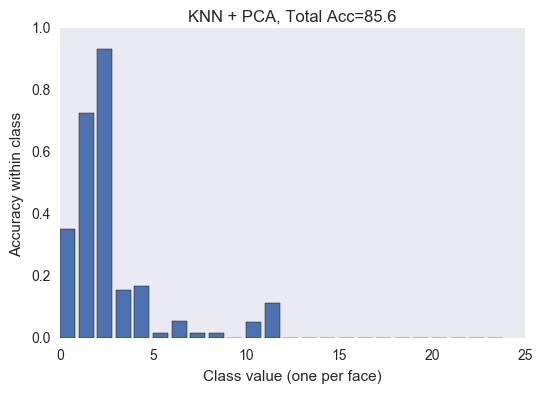

In [62]:
from sklearn.neighbors import KNeighborsClassifier

# setup pipeline to take PCA, then fit a KNN classifier
clf_pipe = Pipeline(
    [('PCA_Eric',PCA(n_components=100,svd_solver='randomized')),
     ('CLF_Eric',KNeighborsClassifier(n_neighbors=5))]
)

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv_object.split(garageAdditionalVars,garageActualValues):
    clf_pipe.fit(garageAdditionalVars[train],garageActualValues[train])
    yhat[test] = clf_pipe.predict(garageAdditionalVars[test])

total_accuracy = mt.accuracy_score(garageActualValues, yhat)
print ('KNN, pipeline accuracy', total_accuracy)
plot_class_acc(garageActualValues,yhat,title="KNN + PCA")

In [64]:
from sklearn.naive_bayes import GaussianNB


# setup pipeline to take PCA, then fit a different classifier
clf_pipe = Pipeline(
    [('PCA',PCA(n_components=100,svd_solver='randomized')),
     ('CLF',GaussianNB())]
)

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv_object.split(garageAdditionalVars,garageActualValues):
    clf_pipe.fit(garageAdditionalVars[train],garageActualValues[train])
    yhat[test] = clf_pipe.predict(garageAdditionalVars[test])

total_accuracy = mt.accuracy_score(garageActualValues, yhat)
print ('Gaussian, pipeline accuracy', total_accuracy)

('Gaussian, pipeline accuracy', 0.7475508538188339)


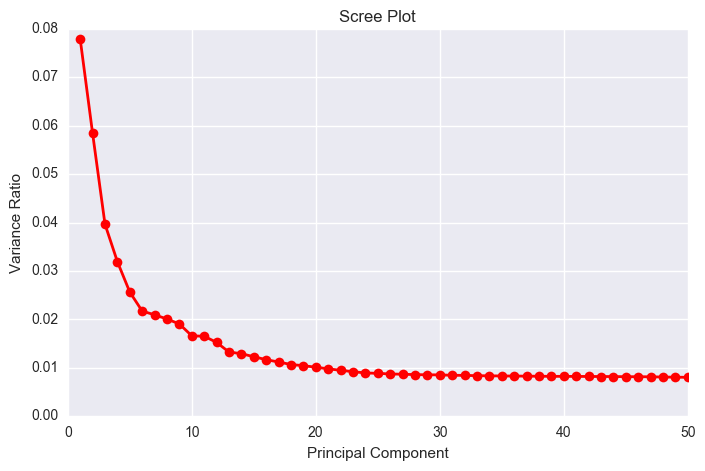

In [44]:
ZillowDataPCA = dfZillowDataNumeric

#This section scales the data in order to create a more useable data set
# scale attributes by the training set
stdsclrObj = StandardScaler()

# find scalings for each column that make this zero mean and unit std
#We use the training data to help fit the standard dev
# find scalings for each column that make this zero mean and unit std
stdsclrObj.fit(ZillowDataPCA) 

# to transform new feature data
# apply to training
ZillowData_scaled = stdsclrObj.transform(ZillowDataPCA)

components = 50

pca = PCA(n_components= components)

#Run PCA
ZillowDataPCA_pca = pca.fit(ZillowData_scaled).transform(ZillowData_scaled) # fit data and then transform it

variance_ratio = pca.explained_variance_ratio_

fig = plt.figure(figsize=(8,5))
#Create 
CompentValues = np.arange(components) + 1
plt.plot(CompentValues, variance_ratio, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.show()

In [19]:
#Create Cross Validation object and Test and train values
# we want to predict if a house has a garage
if 'log10TaxValue' in dfZillowDataNumeric:
    
    #Get the values for each property
    actualValues = dfZillowDataNumeric['log10TaxValue'].values 
    
    # get rid of the hasgarage variable
    del dfZillowDataNumeric['log10TaxValue'] 

    # Gather all values to use for prediction
    additionalVars = dfZillowDataNumeric.values  

# Create cross validation with KFolds object
num_cv_iterations = 10
#Create Cross Validation objects using folds
cv_object = KFold(n_splits=num_cv_iterations, random_state=None, shuffle=True)

#Create X and Y Train and Test Groups. 
for train_index, test_index in cv_object.split(additionalVars):
    print("TRAIN:", train_index, "TEST:", test_index)
    #Full dataset
    X_train = additionalVars[train_index]
    X_test = additionalVars[test_index]
    
    #Target Values
    y_train = actualValues[train_index]
    y_test = actualValues[test_index]
    
print 'Test and Train Data Created'


('TRAIN:', array([      0,       1,       2, ..., 2985214, 2985215, 2985216]), 'TEST:', array([     18,      83,      84, ..., 2985195, 2985203, 2985211]))
('TRAIN:', array([      0,       1,       5, ..., 2985214, 2985215, 2985216]), 'TEST:', array([      2,       3,       4, ..., 2985201, 2985206, 2985210]))
('TRAIN:', array([      0,       1,       2, ..., 2985213, 2985214, 2985216]), 'TEST:', array([     13,      34,      48, ..., 2985180, 2985212, 2985215]))
('TRAIN:', array([      0,       1,       2, ..., 2985213, 2985215, 2985216]), 'TEST:', array([     29,      30,      39, ..., 2985168, 2985188, 2985214]))
('TRAIN:', array([      0,       1,       2, ..., 2985213, 2985214, 2985215]), 'TEST:', array([      7,       8,      27, ..., 2985204, 2985209, 2985216]))
('TRAIN:', array([      2,       3,       4, ..., 2985214, 2985215, 2985216]), 'TEST:', array([      0,       1,      58, ..., 2985202, 2985205, 2985208]))
('TRAIN:', array([      0,       1,       2, ..., 2985214, 29852

('Training Data R2 value:', 0.45809972069741334)


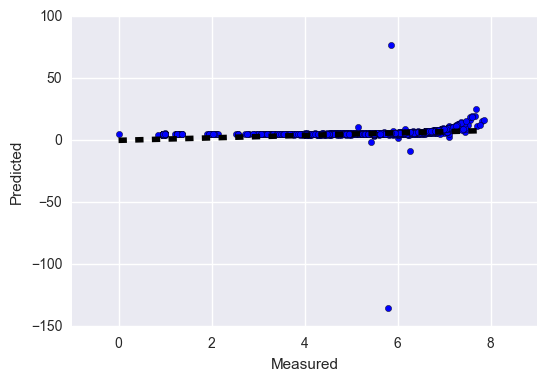

In [117]:
from sklearn.model_selection import cross_val_predict

#Create Linear Regression
n = len(ZillowDataPCA_pca)

#Create Cross Validation Object
cv_object = KFold(n_splits=num_cv_iterations, random_state=None, shuffle=True)

#Create Linear Regression Object
linearReg = LinearRegression()

# train object
linearReg.fit(X_train,y_train)  

# get test set precitions
y_hat = linearReg.predict(X_test)

r2TrainScore = linearReg.score(X_train,y_train)
print('Training Data R2 value:', r2TrainScore)

#Find prediction values
predictedAcc = cross_val_predict(linearReg, X_test, y_test, cv = cv_object)

#Create a graph showing the results of the linear regression
fig, ax = plt.subplots()
ax.scatter(y_test, predictedAcc)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


F_onewayResult(statistic=4.7660879380093508, pvalue=0.013769719163172793)

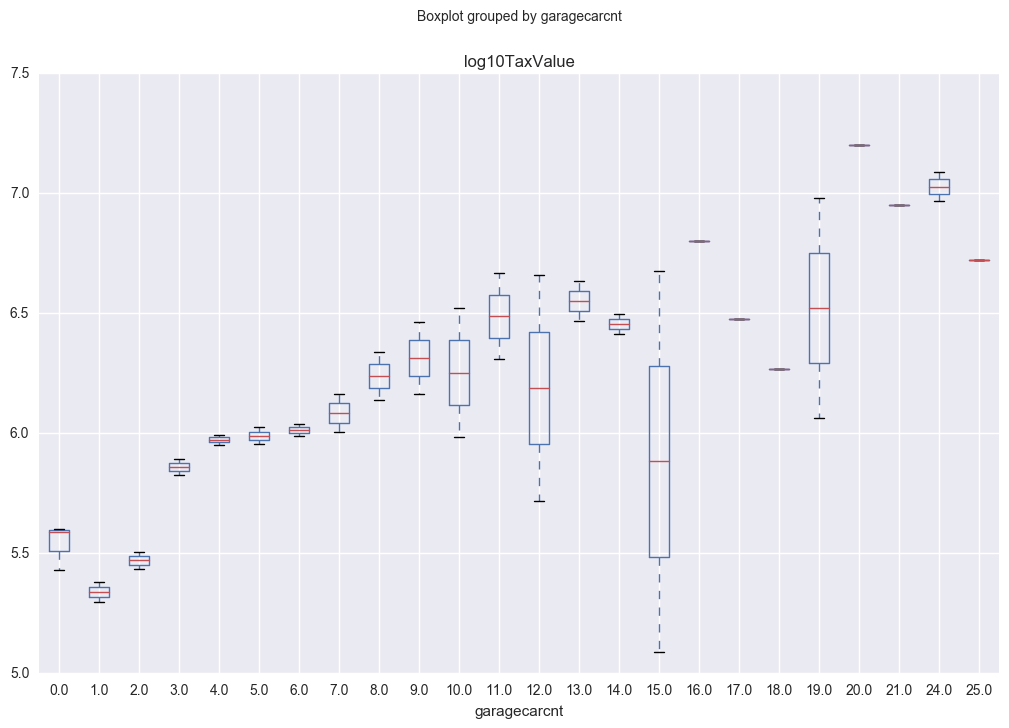

In [47]:
avgValuebyBath = dfForModel.groupby(['countyname', 'garagecarcnt'], as_index = False)['log10TaxValue'].mean()

#print(avgValuebyBath)

LAGargageValue = avgValuebyBath[avgValuebyBath['countyname'] == 'Los Angeles County']
OCGargageValue = avgValuebyBath[avgValuebyBath['countyname'] == 'Orange County']
VentGargageValue = avgValuebyBath[avgValuebyBath['countyname'] == 'Ventura County'] 

#We see that the average value of homes without a garage is lower than ones with it. 

avgValuebyBath.boxplot('log10TaxValue', by='garagecarcnt', figsize=(12, 8))

import scipy.stats as stats

#print(avgValuebyBath[avgValuebyBath['countyname'] == 'Orange County'])
garageCntZero = []
garageCntGTZero = []

garageCntZero.append(OCGargageValue['log10TaxValue'][OCGargageValue['garagecarcnt'] ==0].mean())

garageCntGTZero.append(OCGargageValue['log10TaxValue'][OCGargageValue['garagecarcnt'] > 0].mean())

#print(garageCntZero)
stats.f_oneway(LAGargageValue['log10TaxValue'], OCGargageValue['log10TaxValue'], VentGargageValue['log10TaxValue'])
